## 1) Read in a black/white photo and convert it into a matrix

In [1]:
from skimage import data
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Singular-value decomposition
import numpy as np
from scipy.linalg import svd
import math
import requests
import cv2

In [2]:
# image = data.coins() # just for test
# img_url = 'https://cdn.pixabay.com/photo/2014/11/30/14/11/cat-551554_640.jpg' # kitten
# img_url = 'https://t4.ftcdn.net/jpg/05/62/99/31/360_F_562993122_e7pGkeY8yMfXJcRmclsoIjtOoVDDgIlh.jpg' # cat with sunglasses
img_url = 'https://i.ebayimg.com/images/g/EPoAAOSwNeRgrDwv/s-l1600.jpg' # where's waldo
response = requests.get(img_url, stream=True)

with open('image.png', 'wb') as f:
    f.write(response.content)

img = cv2.imread('image.png')

In [3]:
img.shape

(1125, 1600, 3)

In [4]:
A = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
A.shape

(1125, 1600)

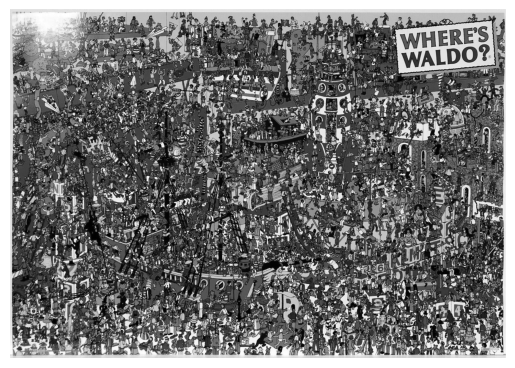

In [6]:
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.show()

## 2) Perform singular value decomposition of the matrix obtained

In [7]:
# SVD
U, s, V = svd(A)
print(f'u.shape:{U.shape}, s.shape:{s.shape}, v.shape:{V.shape}')


u.shape:(1125, 1125), s.shape:(1125,), v.shape:(1600, 1600)


## 3) Recontruct the photo corresponding using only 5%, 10%, 25%, 50% of the singular values

Frobenius norm from formulas: 155705.8125, Frobenius norm from numpy: 155705.5625
Frobenius norm from formulas: 160062.75, Frobenius norm from numpy: 160062.546875
Frobenius norm from formulas: 164782.453125, Frobenius norm from numpy: 164781.953125
Frobenius norm from formulas: 166781.03125, Frobenius norm from numpy: 166780.53125
Frobenius norm from formulas: 167343.87200087277, Frobenius norm from numpy: 167343.87200087265


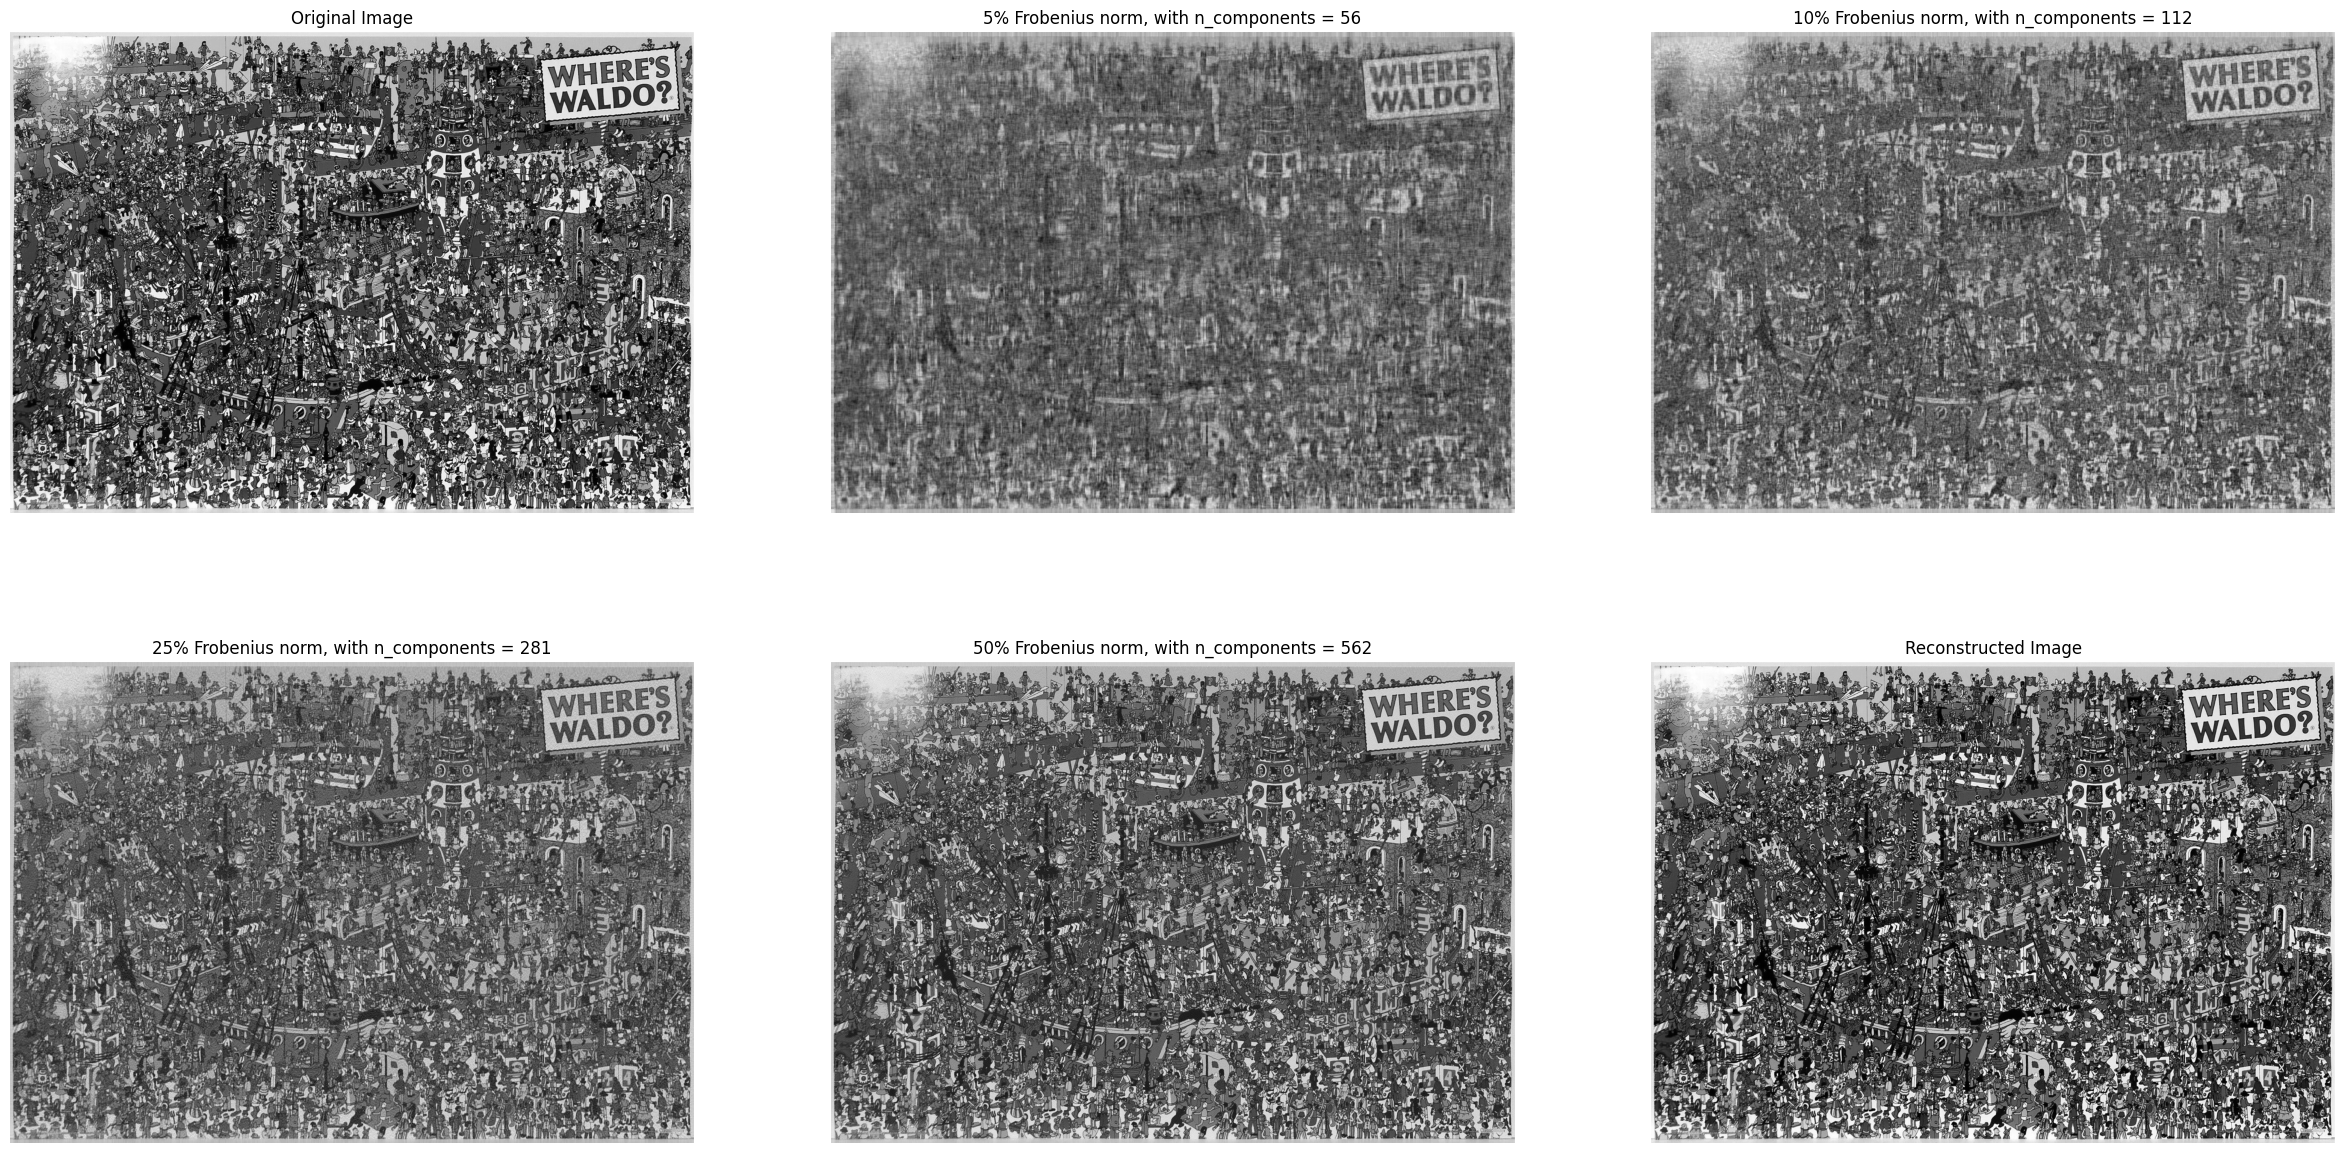

In [8]:
# plot images with different percent of Frobenius norm
perc_comp = [1, 5/100, 10/100, 25/100, 50/100, 1]

plt.figure(figsize=(30, 15))
r = min(A.shape) # for low-rank approximation, take the minimum between the shapes of A
for i in range(len(perc_comp)):

    # print the original image
    if(i == 0):
        plt.subplot(2, 3, i+1)
        plt.imshow(A, cmap='gray')
        plt.axis('off')
        plt.title('Original Image')

    # print the reconstructed photo without low-rank approximation
    elif(i + 1 == len(perc_comp)):
        S = np.zeros((A.shape[0], A.shape[1]))
        # populate Sigma with r x r diagonal matrix
        S[:r, :r] = np.diag(s)
        final_svd = U @ S @ V
        my_frob_norm = np.sqrt(np.sum(np.square(final_svd)))
        np_frob_norm = np.linalg.norm(final_svd, 'fro')
        print(f"Frobenius norm from formulas: {my_frob_norm}, Frobenius norm from numpy: {np_frob_norm}")
        plt.subplot(2, 3, i+1)
        plt.imshow(final_svd, cmap='gray')
        plt.axis('off')
        plt.title('Reconstructed Image')

    # print the reconstructed images from percentages of Frobenius norm
    else:
        n_comp = math.floor(r*perc_comp[i])
        low_rank = U[:, :n_comp] @ np.diag(s[:n_comp]) @ V[:n_comp, :]
        my_frob_norm = np.sqrt(np.sum(np.square(low_rank)))
        np_frob_norm = np.linalg.norm(low_rank, 'fro')
        print(f"Frobenius norm from formulas: {my_frob_norm}, Frobenius norm from numpy: {np_frob_norm}")
        plt.subplot(2, 3, i+1)
        plt.imshow(low_rank, cmap='gray')
        plt.axis('off')
        plt.title(f'{int(perc_comp[i]*100)}% Frobenius norm, with n_components = {n_comp}')

plt.show()

- Print the reconstructed photo. How good is the the quality of the reconstructed photo? \\
The reconstructed photo, which is the last one, has a very good quality compared to the original image, which is the first one printed.

- What percent of the Frobenius norm of the matrix corresponding to the original picture is retained in each case? \\
The percentage of the Frobenius norm is over each printed image.